In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
# fragment level collisions

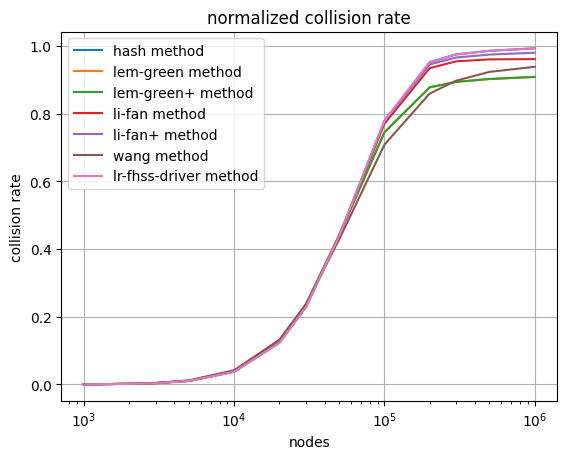

In [3]:
numOCW = 7
numOBW = 280
numGrids = 8
seq_length = 31
startLimit = 500
totalSlots = numOCW * numOBW * (startLimit + seq_length)

data = pd.read_csv('data.csv')
nodes = data['nodes'].to_numpy()
normColRate = data.iloc[:,1:].to_numpy() / totalSlots

for i, method in enumerate(data.keys()[1:]):
    plt.plot(nodes, normColRate[:,i], label=f'{method} method')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

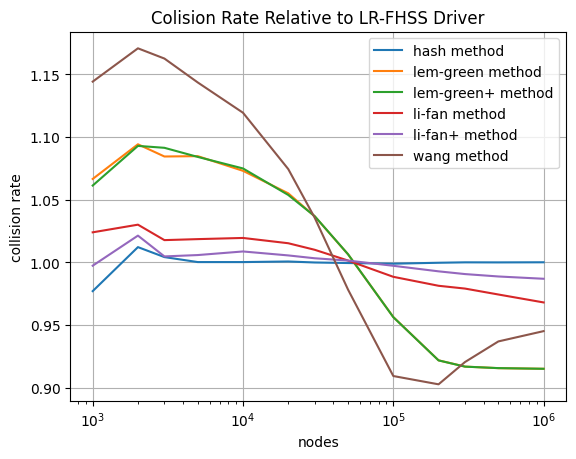

In [4]:
relColRate = data.iloc[:,1:].to_numpy()
for i in range(relColRate.shape[0]):
    relColRate[i] = relColRate[i] / relColRate[i, -1]

for i, method in enumerate(data.keys()[1:-1]):
    plt.plot(nodes, relColRate[:,i], label=f'{method} method')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.grid()
plt.legend()
plt.show()

---
# packet level collisions

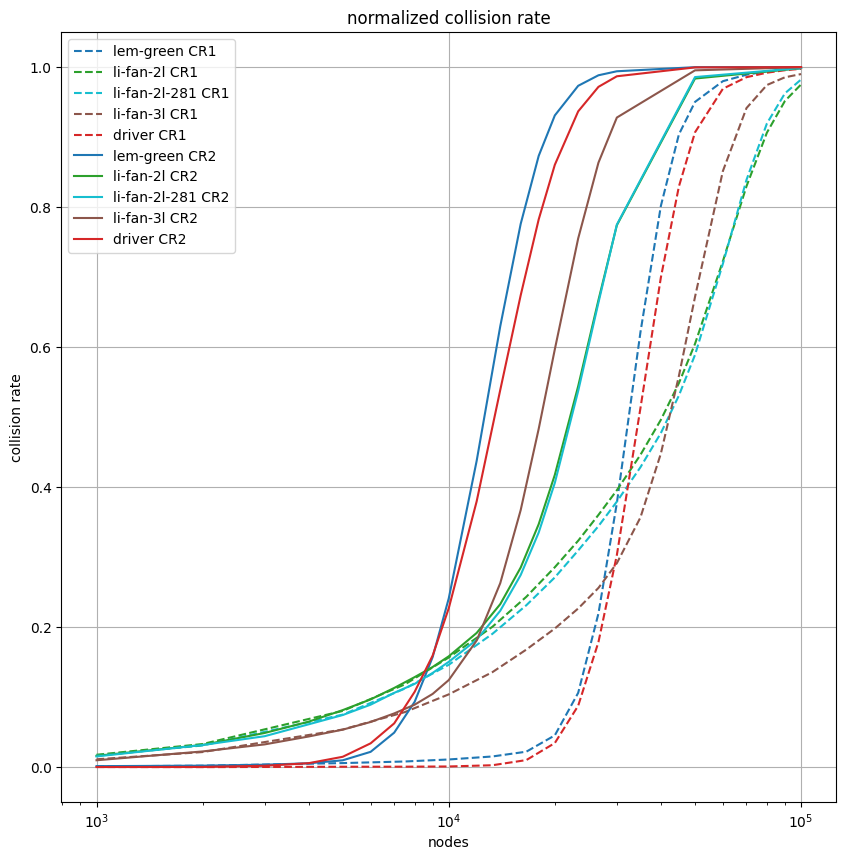

In [43]:
dataCR = pd.read_csv('dataCR.csv', index_col=0, header=None).T
nodesCR1 = dataCR['nodesCR1'].to_numpy()
nodesCR2 = dataCR['nodesCR2'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesCR1, dataCR['lem-green-CR1'], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
#plt.plot(nodesCR1, dataCR['lem-green-2x-CR1'], label=f'lem-green-2x CR1', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-2l-281-CR1'], label=f'li-fan-2l-281 CR1', color='#17becf', linestyle='dashed')
#plt.plot(nodesCR1, dataCR['li-fan-2l-5x-CR1'], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesCR1, dataCR['li-fan-3l-CR1'], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
#plt.plot(nodesCR1, dataCR['li-fan-3l-5x-CR1'], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
#plt.plot(nodesCR1, dataCR['wang-CR1'], label=f'wang CR1', color='#7f7f7f', linestyle='dashed')
#plt.plot(nodesCR1, dataCR['hash-CR1'], label=f'hash CR1', color='#bcbd22', linestyle='dashed')
plt.plot(nodesCR1, dataCR['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesCR2, dataCR['lem-green-CR2'], label=f'lem-green CR2', color='#1f77b4')
#plt.plot(nodesCR2, dataCR['lem-green-2x-CR2'], label=f'lem-green-2x CR2', color='#ff7f0e')
plt.plot(nodesCR2, dataCR['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, dataCR['li-fan-2l-281-CR2'], label=f'li-fan-2l-281 CR2', color='#17becf')
#plt.plot(nodesCR2, dataCR['li-fan-2l-5x-CR2'], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesCR2, dataCR['li-fan-3l-CR2'], label=f'li-fan-3l CR2', color='#8c564b')
#plt.plot(nodesCR2, dataCR['li-fan-3l-5x-CR2'], label=f'li-fan-3l-5x CR2', color='#e377c2')
#plt.plot(nodesCR2, dataCR['wang-CR2'], label=f'wang CR2', color='#7f7f7f')
#plt.plot(nodesCR2, dataCR['hash-CR2'], label=f'hash CR2', color='#bcbd22')
plt.plot(nodesCR2, dataCR['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

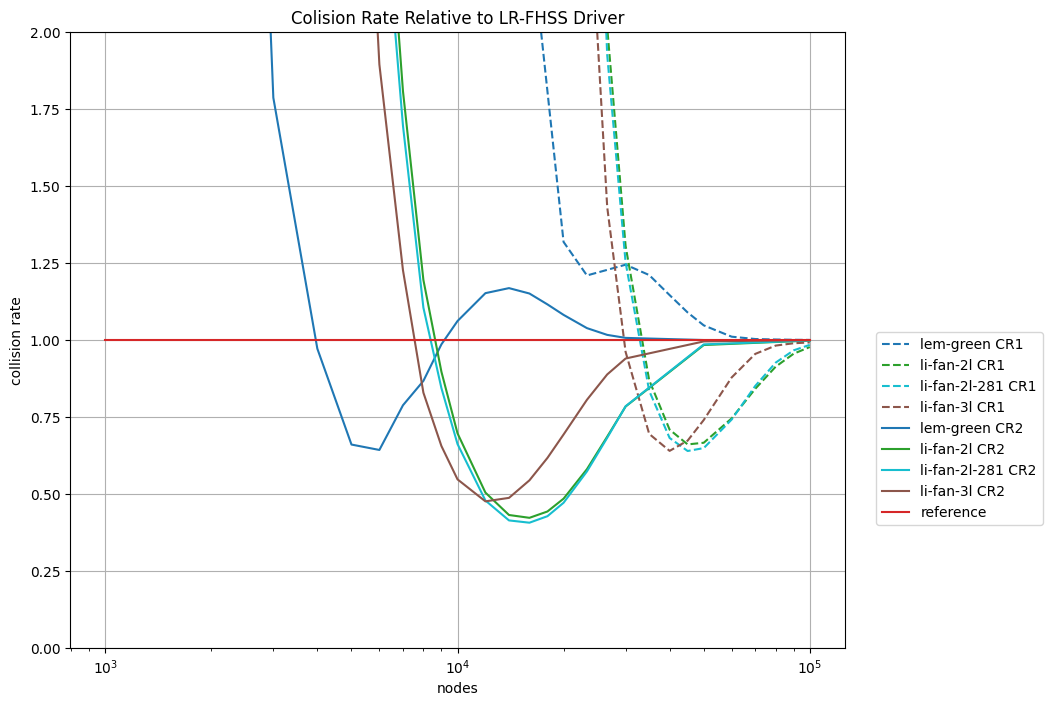

In [44]:
relColRateCR1 = dataCR[['lem-green-CR1', 'lem-green-2x-CR1', 'li-fan-2l-CR1', 'li-fan-2l-281-CR1', 'li-fan-2l-5x-CR1', 'li-fan-3l-CR1', 'li-fan-3l-5x-CR1', 'wang-CR1', 'hash-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = dataCR[['lem-green-CR2', 'lem-green-2x-CR2', 'li-fan-2l-CR2', 'li-fan-2l-281-CR2', 'li-fan-2l-5x-CR2', 'li-fan-3l-CR2', 'li-fan-3l-5x-CR1', 'wang-CR2', 'hash-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(relColRateCR1.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,8))

plt.plot(nodesCR1, relColRateCR1[:,0], label=f'lem-green CR1', color='#1f77b4', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,1], label=f'lem-green-2x CR1', color='#ff7f0e', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,2], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,3], label=f'li-fan-2l-281 CR1', color='#17becf', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,4], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesCR1, relColRateCR1[:,5], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,6], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,7], label=f'wang CR1', color='#7f7f7f', linestyle='dashed')
#plt.plot(nodesCR1, relColRateCR1[:,8], label=f'hash CR1', color='#bcbd22', linestyle='dashed')

plt.plot(nodesCR2, relColRateCR2[:,0], label=f'lem-green CR2', color='#1f77b4')
#plt.plot(nodesCR2, relColRateCR2[:,1], label=f'lem-green-2x CR2', color='#ff7f0e')
plt.plot(nodesCR2, relColRateCR2[:,2], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesCR2, relColRateCR2[:,3], label=f'li-fan-2l-281 CR2', color='#17becf')
#plt.plot(nodesCR2, relColRateCR2[:,4], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesCR2, relColRateCR2[:,5], label=f'li-fan-3l CR2', color='#8c564b')
#plt.plot(nodesCR2, relColRateCR2[:,6], label=f'li-fan-3l-5x CR2', color='#e377c2')
#plt.plot(nodesCR2, relColRateCR2[:,7], label=f'wang CR2', color='#7f7f7f')
#plt.plot(nodesCR2, relColRateCR2[:,8], label=f'hash CR1', color='#bcbd22')

plt.plot(nodesCR2, [1 for _ in range(len(nodesCR2))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
plt.ylim(0,2)
plt.grid()
plt.legend(loc=(1.04, 0.2))
plt.show()

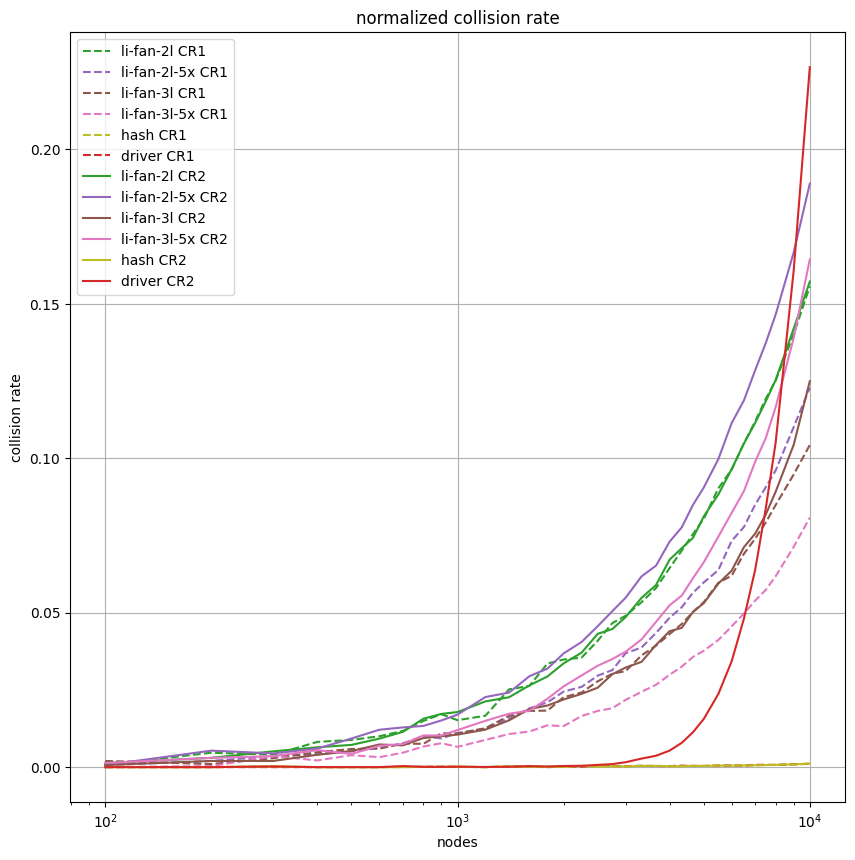

In [12]:
datanLiFanCR = pd.read_csv('dataLiFanCR.csv', index_col=0, header=None).T
nodesLiFan = datanLiFanCR['nodesLiFan'].to_numpy()

plt.figure(figsize=(10,10))

plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-CR1'], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-5x-CR1'], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-CR1'], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-5x-CR1'], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['hash-CR1'], label=f'hash CR1', color='#bcbd22', linestyle='dashed')
plt.plot(nodesLiFan, datanLiFanCR['lr-fhss-driver-CR1'], label=f'driver CR1', color='#d62728', linestyle='dashed')

plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-CR2'], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-2l-5x-CR2'], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-CR2'], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesLiFan, datanLiFanCR['li-fan-3l-5x-CR2'], label=f'li-fan-3l-5x CR2', color='#e377c2')
plt.plot(nodesLiFan, datanLiFanCR['hash-CR1'], label=f'hash CR2', color='#bcbd22')
plt.plot(nodesLiFan, datanLiFanCR['lr-fhss-driver-CR2'], label=f'driver CR2', color='#d62728')

plt.title('normalized collision rate')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.xlim(8e3,5e4)
#plt.ylim(.2,.8)
plt.grid()
plt.legend()
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_14428\2409933800.py:5: RuntimeWarning: divide by zero encountered in divide
  relColRateCR1[i] /= relColRateCR1[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_14428\2409933800.py:5: RuntimeWarning: invalid value encountered in divide
  relColRateCR1[i] /= relColRateCR1[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_14428\2409933800.py:6: RuntimeWarning: divide by zero encountered in divide
  relColRateCR2[i] /= relColRateCR2[i, -1]
C:\Users\diego\AppData\Local\Temp\ipykernel_14428\2409933800.py:6: RuntimeWarning: invalid value encountered in divide
  relColRateCR2[i] /= relColRateCR2[i, -1]


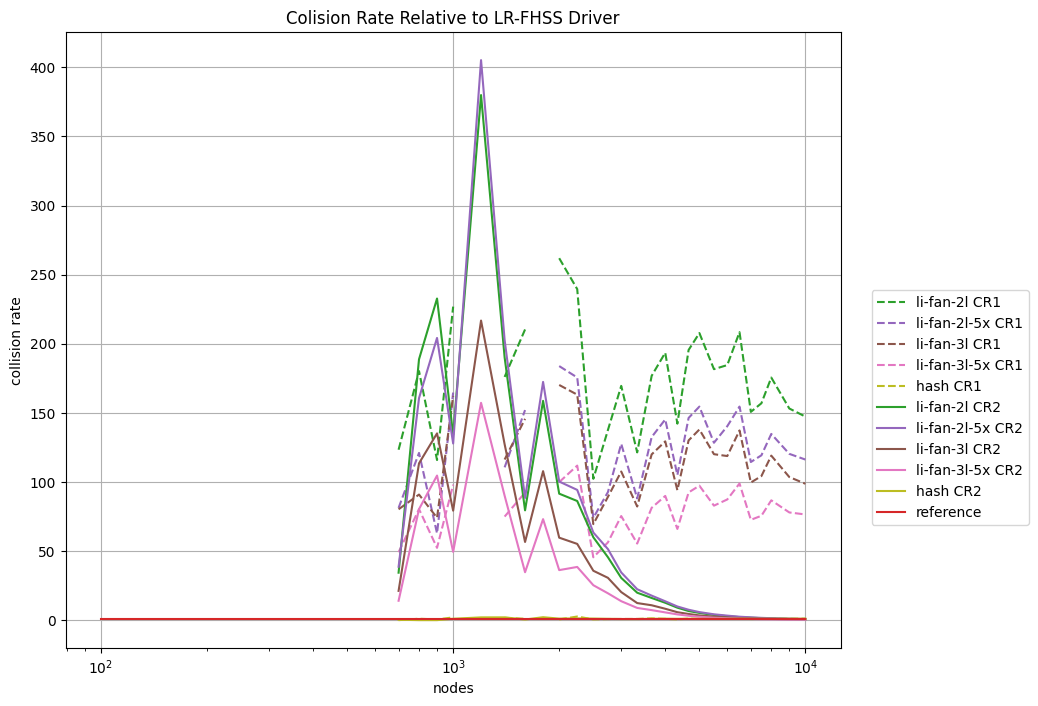

In [23]:
relColRateCR1 = datanLiFanCR[['li-fan-2l-CR1', 'li-fan-2l-5x-CR1', 'li-fan-3l-CR1', 'li-fan-3l-5x-CR1', 'hash-CR1', 'lr-fhss-driver-CR1']].to_numpy()
relColRateCR2 = datanLiFanCR[['li-fan-2l-CR2', 'li-fan-2l-5x-CR2', 'li-fan-3l-CR2', 'li-fan-3l-5x-CR1', 'hash-CR2', 'lr-fhss-driver-CR2']].to_numpy()

for i in range(datanLiFanCR.shape[0]): # same size for relColRateCR2
    relColRateCR1[i] /= relColRateCR1[i, -1]
    relColRateCR2[i] /= relColRateCR2[i, -1]

plt.figure(figsize=(10,8))

plt.plot(nodesLiFan, relColRateCR1[:,0], label=f'li-fan-2l CR1', color='#2ca02c', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,1], label=f'li-fan-2l-5x CR1', color='#9467bd', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,2], label=f'li-fan-3l CR1', color='#8c564b', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,3], label=f'li-fan-3l-5x CR1', color='#e377c2', linestyle='dashed')
plt.plot(nodesLiFan, relColRateCR1[:,4], label=f'hash CR1', color='#bcbd22', linestyle='dashed')

plt.plot(nodesLiFan, relColRateCR2[:,0], label=f'li-fan-2l CR2', color='#2ca02c')
plt.plot(nodesLiFan, relColRateCR2[:,1], label=f'li-fan-2l-5x CR2', color='#9467bd')
plt.plot(nodesLiFan, relColRateCR2[:,2], label=f'li-fan-3l CR2', color='#8c564b')
plt.plot(nodesLiFan, relColRateCR2[:,3], label=f'li-fan-3l-5x CR2', color='#e377c2')
plt.plot(nodesLiFan, relColRateCR2[:,4], label=f'hash CR2', color='#bcbd22')

plt.plot(nodesLiFan, [1 for _ in range(len(nodesLiFan))],  label=f'reference', color='#d62728')

plt.title('Colision Rate Relative to LR-FHSS Driver')
plt.xlabel('nodes')
plt.xscale('log')
plt.ylabel('collision rate')
#plt.ylim(0,3)
plt.grid()
plt.legend(loc=(1.04, 0.2))
plt.show()